# 爬取頭條新聞的標題及網址

In [1]:
import requests
from bs4 import BeautifulSoup

## 製作 Headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'
}


url = 'https://fund.megabank.com.tw/ETFData/djjson/ETNEWSjson.djjson?a=1&P1=mega&P2=&P3=true&P4=false&P5=false'

res = requests.get(url, headers=headers)

for titleInfo in res.json()['ResultSet']['Result']:
    date = titleInfo['V1']
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A={}'.format(titleInfo['V3'])
    print(date)
    print(title)
    print(articleUrl)
    print('==========')

2021/10/12
陸產煤區水患 缺電恐惡化！外資：陸瀕停滯性通膨
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=AF81F2D2-2711-40D2-AF0E-E9108154E881
2021/10/12
投機客美元淨多單19年6月來新高；日圓貶至113、近3年低
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=1C788DB8-429C-4C90-96FF-B70395B8EE23
2021/10/12
疫情來最低...Q3全球PC銷量退燒、增幅縮至個位數
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=903A5EFB-08FA-4312-BC8E-59E5BD852EA8
2021/10/12
價值投資大師Miller：Coinbase市值有機會追上特斯拉
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=98443481-1FF0-4C9F-B15F-488E7D1764BE
2021/10/12
跟隨原油漲勢 全美零售汽油均價同步創下7年新高
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=443293F0-4DA2-4A7D-AA32-8511D0DB7921
2021/10/12
比特幣重返57000美元！與黃金關聯瀕轉負 可望躲通膨
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=F3EBCB01-63E6-4855-9000-33C7CECCC1E6
2021/10/12
特斯

# 整理標題及網址

In [2]:
import pandas as pd

data = list()
for titleInfo in res.json()['ResultSet']['Result']:
    date = titleInfo['V1']
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A={}'.format(titleInfo['V3'])
    tmpDataDict = {
        '日期': date,
        '標題': title,
        '網址': articleUrl
    }
    data.append(tmpDataDict)

df = pd.DataFrame(data=data)
df

,日期,標題,網址
0,2021/10/12,陸產煤區水患 缺電恐惡化！外資：陸瀕停滯性通膨,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
1,2021/10/12,投機客美元淨多單19年6月來新高；日圓貶至113、近3年低,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
2,2021/10/12,疫情來最低...Q3全球PC銷量退燒、增幅縮至個位數,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
3,2021/10/12,價值投資大師Miller：Coinbase市值有機會追上特斯拉,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
4,2021/10/12,跟隨原油漲勢 全美零售汽油均價同步創下7年新高,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
...,...,...,...
95,2021/10/07,《美債》通膨擔憂加劇 10年債殖利率一度升破1.57%,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
96,2021/10/07,《歐股》能源若續漲 歐貿易盈餘恐消失！泛歐指跌1%,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
97,2021/10/06,電子/航運走疲，台股開高走低跌67點、失守16400點,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
98,2021/10/06,10/6新台幣兌美元匯率以27.970元作收，貶值6.3分,https://fund.megabank.com.tw/ETFData/djhtm/ETN...


# 儲存文章

In [3]:
# 測試

resArticle = requests.get('https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=C51241AA-8AE4-4677-A242-B8E2ADD0E1E8', headers=headers)

soupArticle = BeautifulSoup(resArticle.text, 'html.parser')
soupArticle.select('td[class="NewsContent-Down"]')[0].select('span[style="TEXT-ALIGN: left"]')[0].text

'最近大盤震盪大，一部分原因與中國一連串重拳整頓政策有關，大家一定不斷聽到恆大事件、能耗雙控，這些事件背後是否有一貫中國治理邏輯？本集請到長期深入追蹤中國經濟的分析師，幫大家釐清一連串事件原因，以及中國經濟措施後續可能的走向。 \r\n\n\n---------------'

In [4]:
import os

# 創建資料夾用來存放文章
if not os.path.exists('./articleFolder'):
    os.mkdir('./articleFolder')

for titleInfo in res.json()['ResultSet']['Result']:
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A={}'.format(titleInfo['V3'])
    resArticle = requests.get(articleUrl, headers=headers)
    soupArticle = BeautifulSoup(resArticle.text, 'html.parser')
    articleContent = soupArticle.select('td[class="NewsContent-Down"]')[0].text
#     print(articleContent)
    try:
        with open('./articleFolder/{}.txt'.format(title), 'w', encoding='utf-8') as f:
            f.write(articleContent)
    except FileNotFoundError:
        with open('./articleFolder/{}.txt'.format(title.replace('/', '')), 'w', encoding='utf-8') as f:
            f.write(articleContent)
    except OSError:
        pass
#     print('==========') 

# 統計熱門關鍵字

In [5]:
import jieba
import glob

def isContained(orgStr, subStrList):
    for subStr in subStrList:
        if subStr in orgStr:
            return True
    return False

sb = ''
for articleFilePath in glob.glob('./articleFolder/*.txt'):
    with open(articleFilePath, 'r', encoding='utf-8') as f:
        sb += f.read()

jieba.load_userdict('./mydict.txt')
stopWords = [' ', '，', '（', '）', '...', '。', '「', '」', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
wordCutList = [w for w in jieba.cut(sb)]

wordCountDict = dict()
for w in wordCutList:
    if w.__len__() > 1 and not isContained(w, stopWords):
        if w in wordCountDict:
            wordCountDict[w] += 1
        else:
            wordCountDict[w] = 1

# wordCountDict

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bv/8bbkzq895db366kq27vw262r0000gn/T/jieba.cache
Loading model cost 0.565 seconds.
Prefix dict has been built successfully.


# 製作文字雲

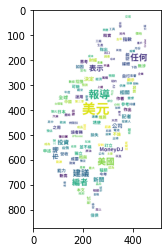

In [6]:
import matplotlib.pyplot as plt
import wordcloud
import numpy
from PIL import Image

# 字體設定
font_path = 'TaipeiSansTCBeta-Bold.ttf'
# 圖片轉陣列
mask = numpy.array(Image.open('taiwan.png'))

wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         mask=mask, # 遮罩
                         font_path=font_path,
                         max_words=150, # 取多少文字在裡面
                         width=874, height=516, # 長寬解析度
                         relative_scaling=1 # 詞頻與詞大小關聯性
                         )
# 生成文字雲
wc.generate_from_frequencies(wordCountDict)

wc.to_file('myWordCloud.png')

plt.imshow(wc)

In [ ]:
wordCountDict